# Нахождение решения задачи Коши методом Адамса второго порядка
*подготовил: Глазков Даниил 207*

![](%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202022-12-20%20%D0%B2%2021.12.07.png)

![](%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202022-12-20%20%D0%B2%2021.12.40.png)

![](%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202022-12-20%20%D0%B2%2021.14.13.png)

--------------------------------------------

$\LARGE Условие \ задачи$

$\large\frac{\mathrm d u}{\mathrm d x} = \int\limits_0^x f(t) \mathrm{d}t,\ u = u(x),\ 0 < x < 1$

$\large u(0) = u_0$

$\large f(t) = \frac{\sin t}{t}$

$\large Начальное\ значение\ N = 20$

--------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin

def f(x):
    return sin(x)/x

N = 20 # начальное значение
h = 1 / N # шаг в сетке

mas_x = np.zeros(N + 1) # сетка
for i in range(N + 1):
    mas_x[i] = i * h

$\LARGE Описание\ алгоритма$

### Идея метода Адамса – использовать не промежуточные вычисления значений правой части дифференциального уравнения внутри отрезка $[x_n, x_{n+1}]$, а значения правой части на предыдущих шагах.
--------------------------------------------

$\LARGE Формула\ Адамса \ второго \ порядка$

$\LARGE\begin{cases}
\frac {y_{i+1} - y_i}{h} = \frac {3}{2} f_i - \frac {1}{2} f_{i-1} \\
y_0 = u_0
\end{cases} \ \large,где\ f_i = f(x_i, y_i) \ \ \ \ \ \ (1)$

#### Заметим, что для того, чтобы начал работать метод Адамса 2 порядка, нужно вычислить еще значение $y_1$ (любым другим способом). Тогда из системы формул (1), выписанных для $y_1, y_2$ (вычисляются значения правых частей $f_0, f_1$, необходимые для того, чтобы метод начал работать), затем уже по этим значениям по формуле метода определяются $y_3, y_4, ...$.
#### Эта процедура называется «разгоном метода» и является обязательной в методе Адамса.

$\large y_1\ неизвестно,\ найдем\ его\ методом\ Эйлера\ \LARGE\begin{cases}
\frac {y_{i+1} - y_i}{h} = f_i \\
y_0 = u_0
\end{cases} \ \large,где\ f_i = f(x_i, y_i)$

--------------------------------------------

In [2]:
# найдем значение интеграла методом прямоугольников
# f наша функция
# a начальная точка отрезка разбиения
# b конечная точка отрезкаразбиения
# N количество отрезков разбиения
def rectangle_method (f, a, b, N):
    ans = 0
    h = (b - a) / N
    mid = (2 * a + h) / 2
    for i in range(N):
        ans += f(mid)
        mid += h
    
    ans *= h
    return ans

mas_f = np.zeros(N + 1) # значения функции в точках сетки
for i in range(1, N + 1): # f0 равняется 0
    mas_f[i] = rectangle_method(f, 0, mas_x[i], (i * 10) + 100)


In [3]:
mas_y = np.zeros(N + 1)
mas_y[0] = 0 # начальное значение
mas_y[1] = mas_y[0] + mas_f[0] * h # нашли y1 методом Эйлера

$\large Используем\ метод\ Адамса$

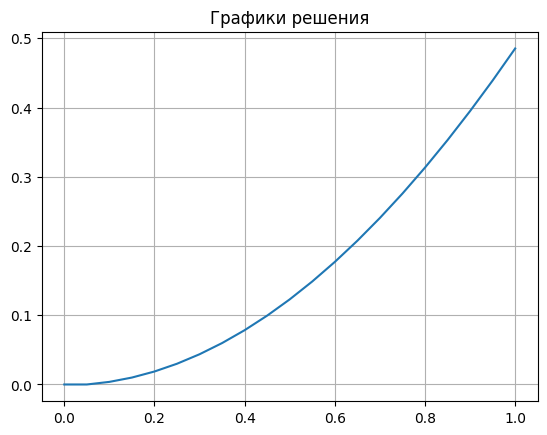

In [4]:
for i in range(1, N):
    mas_y[i + 1] = mas_y[i] + (3 / 2 * mas_f[i] - 1 / 2 * mas_f[i - 1]) * h # счиатем y2, y3, ... меотдом Адамса

plt.title("Графики решения")
plt.grid()
plt.plot(mas_x, mas_y)
plt.show()

# Исследование поведения на сгущающихся сетках и исследование на сходимость

In [5]:
colors = ['mistyrose','green','blue','yellow','purple','black','pink','orange','brown','grey','cyan','magenta','olive','lime','teal','navy',
'aqua','maroon','fuchsia','silver', 'gold', 'indigo', 'violet', 'coral', 'crimson', 'darkblue', 'darkcyan', 'darkgoldenrod','darkgray',
'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen','darkslateblue',
'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'forestgreen', 'gainsboro','gold',
'goldenrod', 'gray', 'green', 'greenyellow', 'hotpink', 'indianred', 'indigo', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon',
'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue',
'lightslategray', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid',
'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'red']

In [6]:
def increase_n(N): # функция, ищущая решения в зависимости от разбиения сетки
    h = 1 / N
    x = np.zeros(N + 1) # сетка
    for i in range(N + 1):
        x[i] = i * h

    mas_f = np.zeros(N + 1) # значения функции в точках сетки
    for i in range(1, N + 1):
        mas_f[i] = rectangle_method(f, 0, x[i], i + 100)

    y = np.zeros(N + 1)
    y[0] = 0 # начальное значение
    y[1] = y[0] + mas_f[0] * h # нашли методом Эйлера

    for i in range(1, N):
        y[i + 1] = y[i] + (3 / 2 * mas_f[i] - 1 / 2 * mas_f[i - 1]) * h # ищем методом Адамса
        
    plt.plot(x, y, colors[int(N / 10 - 10)], label = "N = " + str(N))
    plt.plot([0, 0.05], [N / 2000, N / 2000], colors[int(N / 10) - 10])
    if (N / 10 % 5 == 0):
        plt.text(0.05, N / 2000, "N = " + str(N))

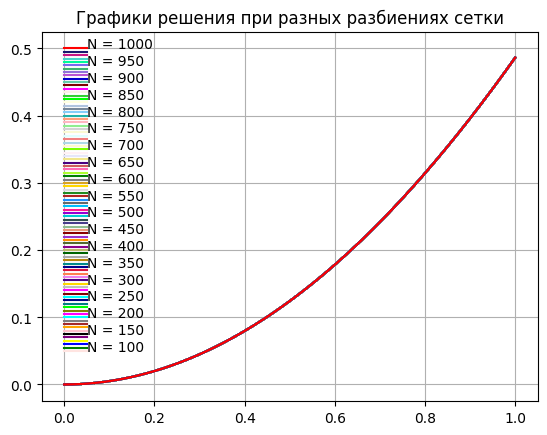

In [7]:
for i in range (10, 101):
    increase_n(i * 10)

plt.title("Графики решения при разных разбиениях сетки")
plt.grid()
plt.show()

#### Посмотрим на график решения с количеством точек разбиения - 1280, и будем смотреть на отличие этого решения от решений с более маленьким разбиением в общих точках этих разбиений

In [8]:
def find_desicion(N): # функция, ищущая решения в зависимости от разбиения сетки
    h = 1 / N
    x = np.zeros(N + 1) # сетка
    for i in range(N + 1):
        x[i] = i * h

    mas_f = np.zeros(N + 1) # значения функции в точках сетки
    for i in range(1, N + 1):
        mas_f[i] = rectangle_method(f, 0, x[i], i + 100)

    y = np.zeros(N + 1)
    y[0] = 0 # начальное значение
    y[1] = y[0] + mas_f[0] * h # нашли методом Эйлера

    for i in range(1, N):
        y[i + 1] = y[i] + (3 / 2 * mas_f[i] - 1 / 2 * mas_f[i - 1]) * h # ищем методом Адамса
        
    plt.plot(x, y, 'b.', markersize=3)
    return y

In [9]:
def find_desicion_2(N, N2): # функция, ищущая решения в зависимости от разбиения сетки
    h = 1 / N
    x = np.zeros(N + 1) # сетка
    for i in range(N + 1):
        x[i] = i * h

    mas_f = np.zeros(N + 1) # значения функции в точках сетки
    for i in range(1, N + 1):
        mas_f[i] = rectangle_method(f, 0, x[i], i + 100)

    y = np.zeros(N + 1)
    y[0] = 0 # начальное значение
    y[1] = y[0] + mas_f[0] * h # нашли методом Эйлера

    for i in range(1, N):
        y[i + 1] = y[i] + (3 / 2 * mas_f[i] - 1 / 2 * mas_f[i - 1]) * h # ищем методом Адамса
        
    for i in range(N2):
        plt.plot([x[i * int(N / N2)], x[i * int(N / N2)]], [y[i * int(N / N2)], y[i * int(N / N2)]], 'r.', markersize=1)

    return y

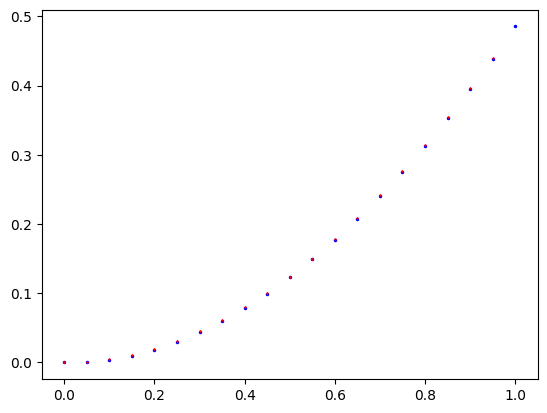

  Значение у_1    Значение у    Их разность
 0.0000000000   0.0000000000   0.0000000000 
 0.0012496081   0.0000000000   0.0012496081 
 0.0049983066   0.0037494792   0.0012488274 
 0.0112426677   0.0099954875   0.0012471802 
 0.0199774921   0.0187328233   0.0012446689 
 0.0311955119   0.0299542149   0.0012412970 
 0.0448874011   0.0436503317   0.0012370694 
 0.0610417899   0.0598097977   0.0012319923 
 0.0796452818   0.0784192089   0.0012260729 
 0.1006824732   0.0994631534   0.0012193199 
 0.1241359768   0.1229242339   0.0012117430 
 0.1499864476   0.1487830944   0.0012033532 
 0.1782126115   0.1770184487   0.0011941628 
 0.2087912973   0.2076071123   0.0011841850 
 0.2416974712   0.2405240368   0.0011734343 
 0.2769042739   0.2757423474   0.0011619265 
 0.3143830607   0.3132333826   0.0011496781 
 0.3541034440   0.3529667371   0.0011367069 
 0.3960333382   0.3949103063   0.0011230319 
 0.4401390072   0.4390303344   0.0011086728 
 0.4863851144   0.4852914641   0.0010936504 


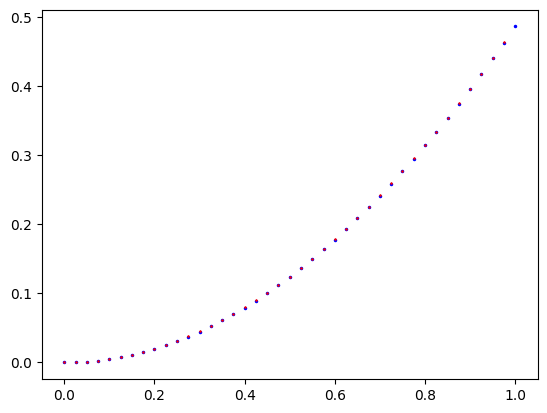

  Значение у_1    Значение у    Их разность
 0.0000000000   0.0000000000   0.0000000000 
 0.0003121894   0.0000000000   0.0003121894 
 0.0012496081   0.0009374674   0.0003121407 
 0.0028117557   0.0024997179   0.0003120378 
 0.0049983066   0.0046864260   0.0003118807 
 0.0078088057   0.0074971362   0.0003116695 
 0.0112426677   0.0109312634   0.0003114043 
 0.0152991779   0.0149880927   0.0003110851 
 0.0199774921   0.0196667800   0.0003107121 
 0.0252766374   0.0249663520   0.0003102854 
 0.0311955119   0.0308857068   0.0003098051 
 0.0377328857   0.0374236143   0.0003092714 
 0.0448874011   0.0445787167   0.0003086844 
 0.0526575730   0.0523495287   0.0003080443 
 0.0610417899   0.0607344385   0.0003073515 
 0.0700383139   0.0697317079   0.0003066060 
 0.0796452818   0.0793394736   0.0003058082 
 0.0898607056   0.0895557473   0.0003049583 
 0.1006824732   0.1003784166   0.0003040566 
 0.1121083495   0.1118052460   0.0003031035 
 0.1241359768   0.1238338777   0.0003020992 
 0.13676287

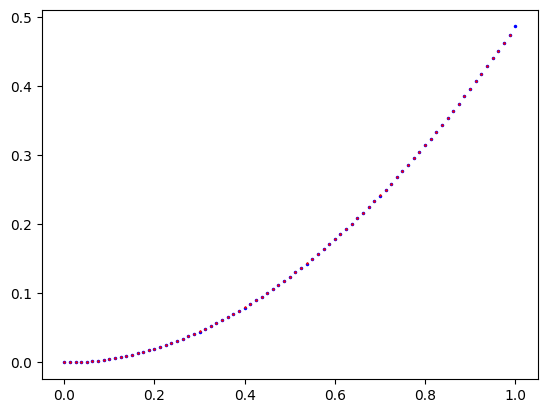

  Значение у_1    Значение у    Их разность
 0.0000000000   0.0000000000   0.0000000000 
 0.0000778195   0.0000000000   0.0000778195 
 0.0003121894   0.0002343730   0.0000778165 
 0.0007027924   0.0006249824   0.0000778100 
 0.0012496081   0.0011718079   0.0000778003 
 0.0019526081   0.0018748210   0.0000777871 
 0.0028117557   0.0027339851   0.0000777706 
 0.0038270061   0.0037492555   0.0000777506 
 0.0049983066   0.0049205793   0.0000777274 
 0.0063255962   0.0062478955   0.0000777007 
 0.0078088057   0.0077311351   0.0000776707 
 0.0094478580   0.0093702207   0.0000776373 
 0.0112426677   0.0111650672   0.0000776005 
 0.0131931415   0.0131155812   0.0000775603 
 0.0152991779   0.0152216610   0.0000775168 
 0.0175606673   0.0174831973   0.0000774700 
 0.0199774921   0.0199000724   0.0000774197 
 0.0225495267   0.0224721606   0.0000773662 
 0.0252766374   0.0251993281   0.0000773092 
 0.0281586823   0.0280814334   0.0000772489 
 0.0311955119   0.0311183266   0.0000771853 
 0.03438696

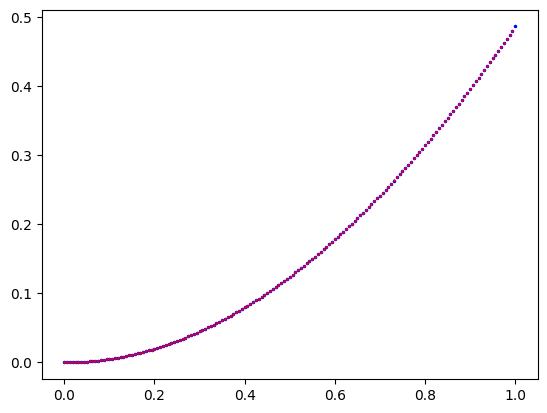

  Значение у_1    Значение у    Их разность
 0.0000000000   0.0000000000   0.0000000000 
 0.0000192261   0.0000000000   0.0000192261 
 0.0000778195   0.0000585936   0.0000192259 
 0.0001754744   0.0001562489   0.0000192255 
 0.0003121894   0.0002929646   0.0000192249 
 0.0004879629   0.0004687388   0.0000192241 
 0.0007027924   0.0006835694   0.0000192230 
 0.0009566753   0.0009374535   0.0000192218 
 0.0012496081   0.0012303878   0.0000192204 
 0.0015815872   0.0015623684   0.0000192187 
 0.0019526081   0.0019333912   0.0000192169 
 0.0023626660   0.0023434512   0.0000192148 
 0.0028117557   0.0027925431   0.0000192125 
 0.0032998711   0.0032806611   0.0000192101 
 0.0038270061   0.0038077988   0.0000192074 
 0.0043931538   0.0043739493   0.0000192045 
 0.0049983066   0.0049791053   0.0000192014 
 0.0056424569   0.0056232589   0.0000191980 
 0.0063255962   0.0063064017   0.0000191945 
 0.0070477156   0.0070285248   0.0000191908 
 0.0078088057   0.0077896189   0.0000191868 
 0.00860885

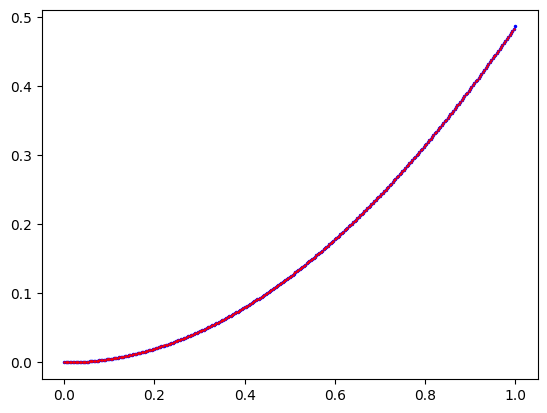

  Значение у_1    Значение у    Их разность
 0.0000000000   0.0000000000   0.0000000000 
 0.0000045776   0.0000000000   0.0000045776 
 0.0000192261   0.0000146484   0.0000045776 
 0.0000436400   0.0000390624   0.0000045776 
 0.0000778195   0.0000732419   0.0000045776 
 0.0001217643   0.0001171868   0.0000045775 
 0.0001754744   0.0001708969   0.0000045775 
 0.0002389495   0.0002343721   0.0000045774 
 0.0003121894   0.0003076121   0.0000045773 
 0.0003951940   0.0003906168   0.0000045772 
 0.0004879629   0.0004833858   0.0000045771 
 0.0005904958   0.0005859188   0.0000045770 
 0.0007027924   0.0006982156   0.0000045768 
 0.0008248524   0.0008202757   0.0000045767 
 0.0009566753   0.0009520987   0.0000045765 
 0.0010982607   0.0010936843   0.0000045764 
 0.0012496081   0.0012450320   0.0000045762 
 0.0014107171   0.0014061412   0.0000045760 
 0.0015815872   0.0015770114   0.0000045758 
 0.0017622177   0.0017576421   0.0000045755 
 0.0019526081   0.0019480328   0.0000045753 
 0.00215275

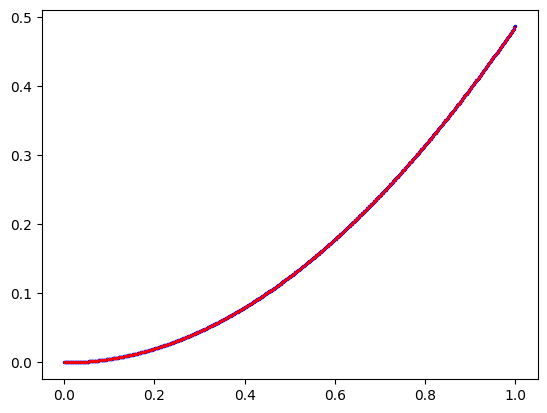

  Значение у_1    Значение у    Их разность
 0.0000000000   0.0000000000   0.0000000000 
 0.0000009155   0.0000000000   0.0000009155 
 0.0000045776   0.0000036621   0.0000009155 
 0.0000106811   0.0000097656   0.0000009155 
 0.0000192261   0.0000183105   0.0000009155 
 0.0000302124   0.0000292968   0.0000009155 
 0.0000436400   0.0000427245   0.0000009155 
 0.0000595091   0.0000585936   0.0000009155 
 0.0000778195   0.0000769040   0.0000009155 
 0.0000985712   0.0000976557   0.0000009155 
 0.0001217643   0.0001208488   0.0000009155 
 0.0001473987   0.0001464832   0.0000009155 
 0.0001754744   0.0001745589   0.0000009155 
 0.0002059913   0.0002050758   0.0000009155 
 0.0002389495   0.0002380340   0.0000009155 
 0.0002743489   0.0002734334   0.0000009155 
 0.0003121894   0.0003112740   0.0000009155 
 0.0003524711   0.0003515557   0.0000009154 
 0.0003951940   0.0003942785   0.0000009154 
 0.0004403579   0.0004394425   0.0000009154 
 0.0004879629   0.0004870475   0.0000009154 
 0.00053800

In [10]:
i = 20
while (i < 1280):
    y = find_desicion(i) # решение для разбиения с i точками
    y_1 = find_desicion_2(1280, i) # решение для разбиения с 1280 точками
    plt.show()
    print("  Значение у_1    Значение у    Их разность")
    for j in range(i + 1):
        print(" %.10f " % y_1[j * int(1280 / i)], " %.10f " % y[j], " %.10f " % (y_1[j * int(1280 / i)] - y[j]))
    i *= 2

##### Можно заметить, что при увелечении количества точек разбиения, решение стремится к более точному (к решению, полученному с помощья сетки с 1280 точками). Следовательно, можно сделать вывод, что сходимость однозначно присутствует.